price = f (points, year, province, region_1, variety, winery)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv('data/winemag-data-130k-v2.csv',index_col='Unnamed: 0')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [22]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.dropna(subset=['price','points','variety'] ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111592 entries, 1 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                111537 non-null  object 
 1   description            111592 non-null  object 
 2   designation            79533 non-null   object 
 3   points                 111592 non-null  int64  
 4   price                  111592 non-null  float64
 5   province               111537 non-null  object 
 6   region_1               93580 non-null   object 
 7   region_2               46568 non-null   object 
 8   taster_name            88320 non-null   object 
 9   taster_twitter_handle  83837 non-null   object 
 10  title                  111592 non-null  object 
 11  variety                111592 non-null  object 
 12  winery                 111592 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.9+ MB


<AxesSubplot:>

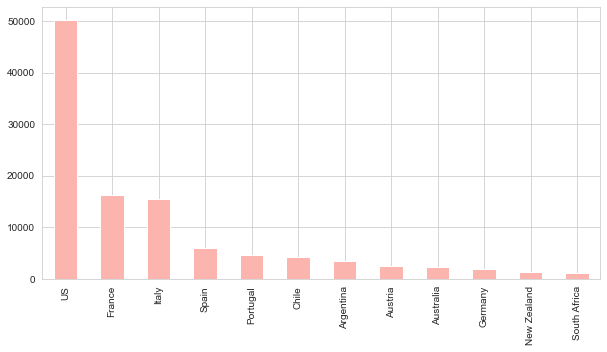

In [23]:
df = df[df['country'].isin(df['country'].value_counts()[df['country'].value_counts()>500].index)]

df_country = df['country'].value_counts()
df_country.plot(kind='bar',figsize=(10,5),cmap='Pastel1')

In [24]:
#Extract the year from the title column
df['year'] = df['title'].str.extract('(\d{4})',expand=False)
df.dropna(subset=['year'],inplace=True)
df['year'] = df['year'].astype(int)

#keep only the years between 1970 and 2022
df = df[df['year']>1970]
df = df[df['year']<2022]

df['year'].describe()

count    105383.000000
mean       2010.642599
std           3.640036
min        1973.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: year, dtype: float64

In [25]:
df.drop(['description','designation','taster_twitter_handle','taster_name','region_2','country','title'],axis=1, inplace=True)

#remove outliers in price
df = df[df['price']<100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101731 entries, 1 to 129970
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   points    101731 non-null  int64  
 1   price     101731 non-null  float64
 2   province  101731 non-null  object 
 3   region_1  86419 non-null   object 
 4   variety   101731 non-null  object 
 5   winery    101731 non-null  object 
 6   year      101731 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


In [26]:
top_province = df['province'].value_counts()
df = df[df['province'].isin(top_province.index[:1000])]

top_variety = df['variety'].value_counts()
df = df[df['variety'].isin(top_variety.index[:1000])]

top_region_1 = df['region_1'].value_counts()
df = df[df['region_1'].isin(top_region_1.index[:1000])]

In [27]:
top_winery = df['winery'].value_counts()
df = df[df['winery'].isin(top_winery.index[:1000])]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36376 entries, 7 to 129970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   points    36376 non-null  int64  
 1   price     36376 non-null  float64
 2   province  36376 non-null  object 
 3   region_1  36376 non-null  object 
 4   variety   36376 non-null  object 
 5   winery    36376 non-null  object 
 6   year      36376 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ MB


In [29]:
df = pd.get_dummies(df,columns=['province','region_1','variety', 'winery'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36376 entries, 7 to 129970
Columns: 1960 entries, points to winery_àMaurice
dtypes: float64(1), int64(2), uint8(1957)
memory usage: 69.0 MB


In [30]:
df.columns

Index(['points', 'price', 'year', 'province_Alsace', 'province_Andalucia',
       'province_Australia Other', 'province_Beaujolais', 'province_Bordeaux',
       'province_Burgundy', 'province_California',
       ...
       'winery_Xavier Flouret', 'winery_Y Rousseau', 'winery_Yalumba',
       'winery_ZD', 'winery_Zaca Mesa', 'winery_Zenato', 'winery_Zolo',
       'winery_Zorzal', 'winery_Zuccardi', 'winery_àMaurice'],
      dtype='object', length=1960)

In [31]:
#create target variable and features, afterward split the data into train and test
from sklearn.model_selection import train_test_split

target = df['price'].copy()
features = df[['points','year']].copy()
#features = df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=0)

In [32]:
#OLS with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

#print regression score and mean squared error
print("MSE: %.2f"
      % mean_squared_error(y_test, model_1.predict(X_test)))
print('R2: %.2f' % r2_score(y_test, model_1.predict(X_test)))

MSE: 241.96
R2: 0.33


In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

2022-05-02 19:20:48.593718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-02 19:20:48.603911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [34]:
dnn_model = build_and_compile_model(normalizer)

In [35]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 2)                 5         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,422
Trainable params: 4,417
Non-trainable params: 5
_________________________________________________________________


In [36]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)

In [37]:
%%time
history = dnn_model.fit(
    y_train,
    X_train,
    validation_split=0.2,
    verbose=0, epochs=100)

2022-05-02 19:25:20.236567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-02 19:25:24.644679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 